<a href="https://colab.research.google.com/github/vernandy06/TimeSeriesAirPassengerwithARIMA/blob/main/TimeSeriesAirPassengerwithARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload(
)

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
import plotly.express as px
import pandas as pd

# Read in the data
data = pd.read_csv('AirPassengers.csv')

# Plot the data
fig = px.line(data, x='Month', y='#Passengers',
              labels=({'#Passengers': 'Passengers', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Airline Passengers', width=650,
                  title_x=0.5, height=400)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

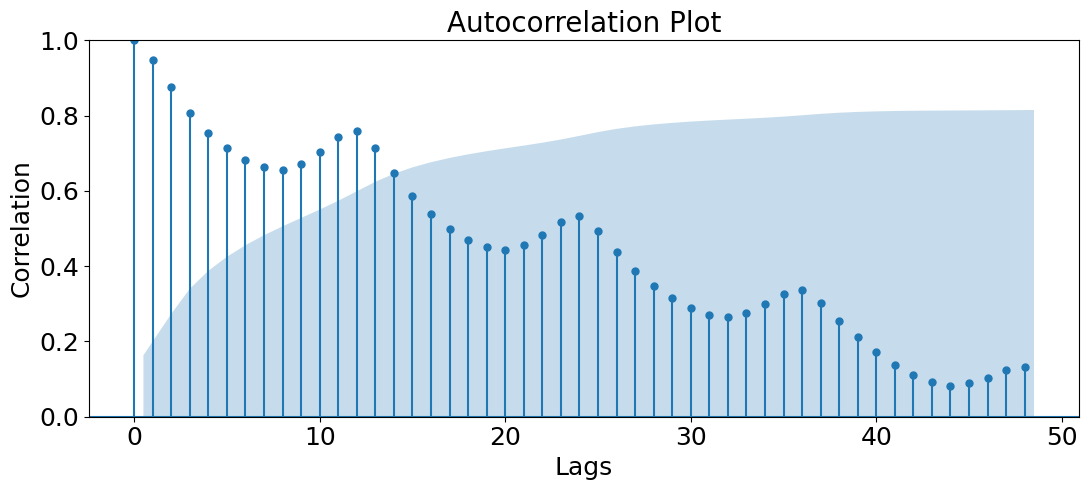

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(data['#Passengers'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

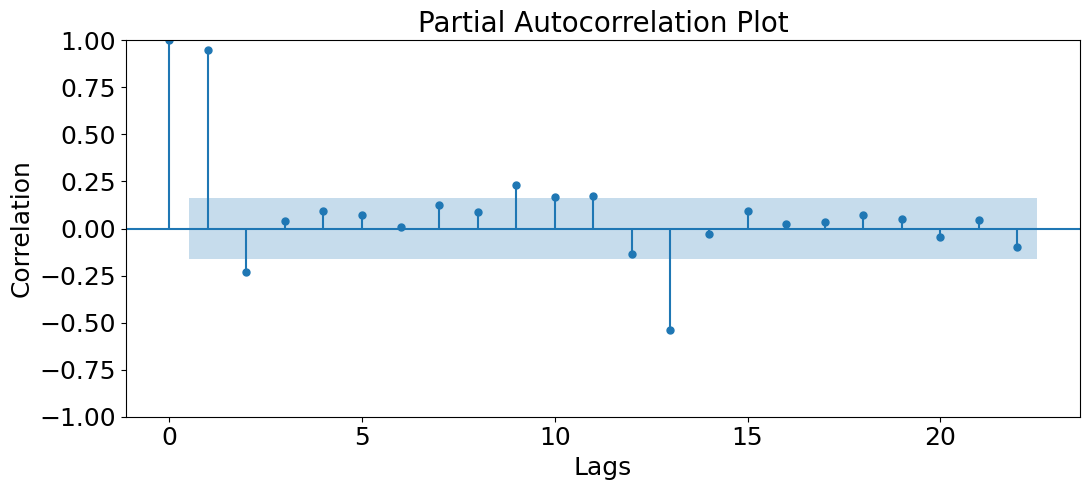

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rc("figure", figsize=(11,5))
plot_pacf(data['#Passengers'], method='ywm')
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [ ]:
data["Month"]=pd.to_datetime(data["Month"])
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data["Month"]=pd.to_datetime(data["Month"])
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [ ]:
data.set_index("Month",inplace=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


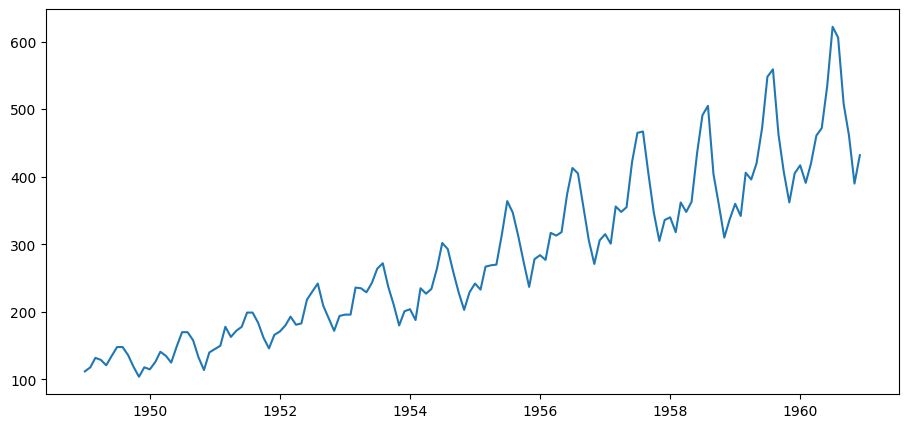

In [ ]:
plt.plot(data["#Passengers"])

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_=adfuller(data)

Cek Stasioneritas dari data dengan menggunakan statistika adfuller


In [ ]:
print(pvalue) #if pvalue > 0.05 then data is not stationary

0.991880243437641


In [ ]:
print(adf)

0.8153688792060498


In [ ]:
print(critical_values_)

{'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [ ]:
data["year"]=[d.year for d in data.index]
data

,#Passengers,year
Month,,
1949-01-01,112,1949
1949-02-01,118,1949
1949-03-01,132,1949
1949-04-01,129,1949
1949-05-01,121,1949
...,...,...
1960-08-01,606,1960
1960-09-01,508,1960
1960-10-01,461,1960


In [ ]:
data["month"]=[d.strftime('%b') for d in data.index]
data

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


<Axes: xlabel='year', ylabel='#Passengers'>

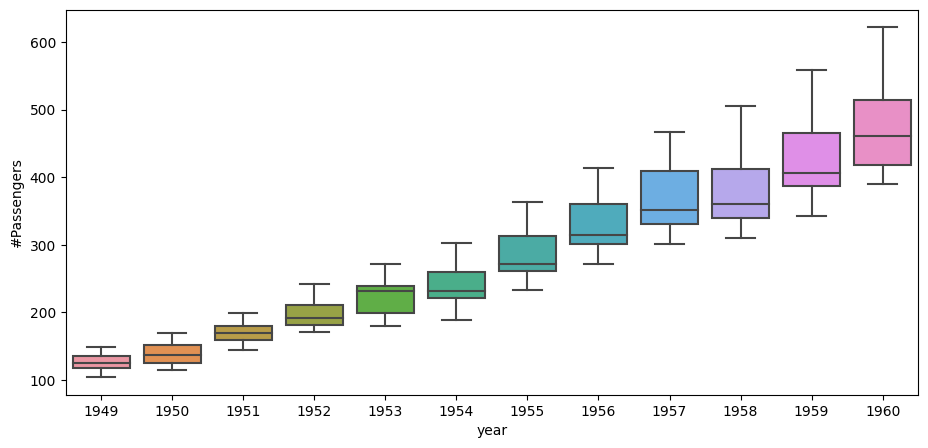

In [ ]:
sns.boxplot(x='year',y='#Passengers',data=data)

<Axes: xlabel='month', ylabel='#Passengers'>

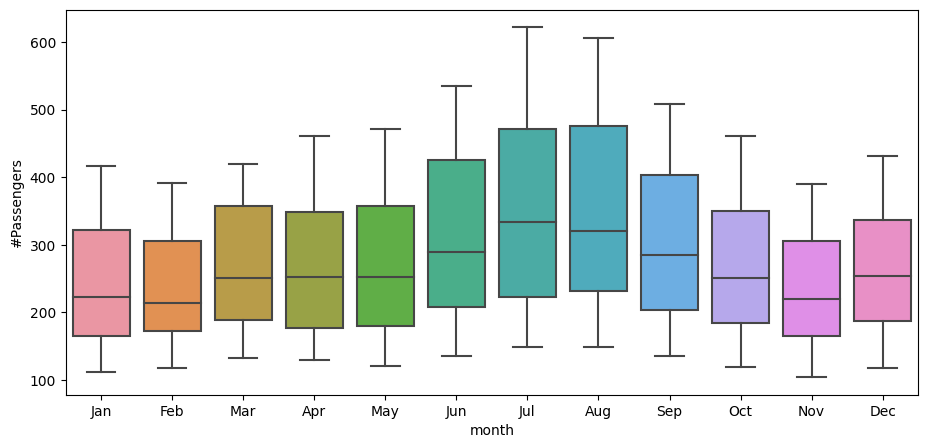

In [ ]:

sns.boxplot(x='month',y='#Passengers',data=data)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(data["#Passengers"],
                             model='additive'
                             )

In [ ]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

In [ ]:

trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [ ]:
sesonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [ ]:
residual

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

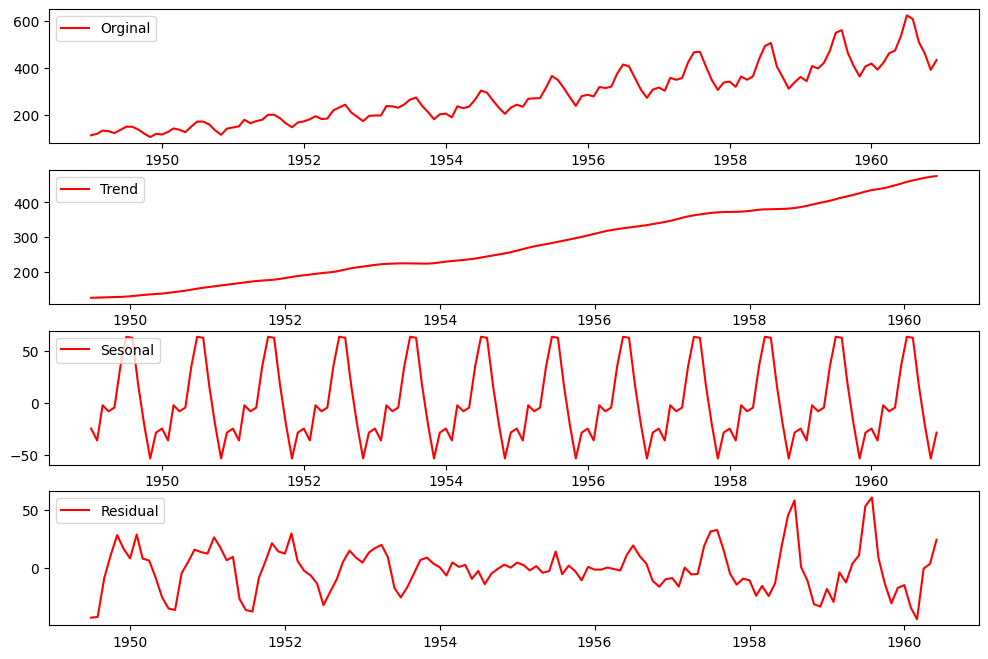

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data["#Passengers"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.7 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model=auto_arima(data["#Passengers"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=1.06 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=2.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=1.50 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=11.33 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.02 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.75 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.51 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.00 sec
 ARIMA(0,1,1)(1,1,0)[12]    

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 10 Apr 2023   AIC                           1019.178
Time:                                     04:40:14   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
size=int(len(data)*0.66)
X_train,X_test=data[0:size],data[size:len(data)]

In [ ]:
X_train.shape

(95, 3)

In [ ]:
X_test.shape

(49, 3)

In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(X_train["#Passengers"],
             order=(0,1,1),
             seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -301.702
Date:                             Mon, 10 Apr 2023   AIC                            611.404
Time:                                     04:42:04   BIC                            621.031
Sample:                                 01-01-1949   HQIC                           615.270
                                      - 11-01-1956                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2597      0.104     -2.503      0.012      -0.463      -0.056
ar.S.L12      -0.2033      0.111     -1.829      0.067      -0.421       0.015
ar.S.L24       0.0548      0.126      0.435      0.663      -0.192       0.302
sigma2        91.1087     15.146      6.015      0.000      61.423     120.795
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.99   Prob(JB):                         0.32
Heteroskedasticity (H):               1.75   Skew:                             0.39
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1949-01-01      0.000000
1949-02-01    111.998607
1949-03-01    117.999851
1949-04-01    131.999652
1949-05-01    129.000075
                 ...    
1956-07-01    418.180198
1956-08-01    398.039710
1956-09-01    368.450774
1956-10-01    321.899996
1956-11-01    275.639330
Freq: MS, Name: predicted_mean, Length: 95, dtype: float64

In [ ]:
st_index=len(X_train)
ed_index=len(data)-1
predction=result.predict(st_index,ed_index)
predction

1956-12-01    310.429023
1957-01-01    318.400466
1957-02-01    311.377581
1957-03-01    349.444991
1957-04-01    347.213116
1957-05-01    351.070914
1957-06-01    405.656739
1957-07-01    447.292958
1957-08-01    437.024522
1957-09-01    390.019472
1957-10-01    342.817398
1957-11-01    306.807724
1957-12-01    347.378479
1958-01-01    354.565341
1958-02-01    347.656752
1958-03-01    386.446023
1958-04-01    383.525726
1958-05-01    387.835041
1958-06-01    443.311431
1958-07-01    483.863442
1958-08-01    474.549615
1958-09-01    426.113313
1958-10-01    377.942651
1958-11-01    342.247905
1958-12-01    382.500402
1959-01-01    389.954861
1959-02-01    383.021779
1959-03-01    421.558335
1959-04-01    418.874938
1959-05-01    423.029834
1959-06-01    478.247629
1959-07-01    519.164601
1959-08-01    509.532325
1959-09-01    461.551211
1959-10-01    413.676045
1959-11-01    377.861917
1959-12-01    418.241713
1960-01-01    425.598752
1960-02-01    418.676916
1960-03-01    457.304427


<Axes: xlabel='Month'>

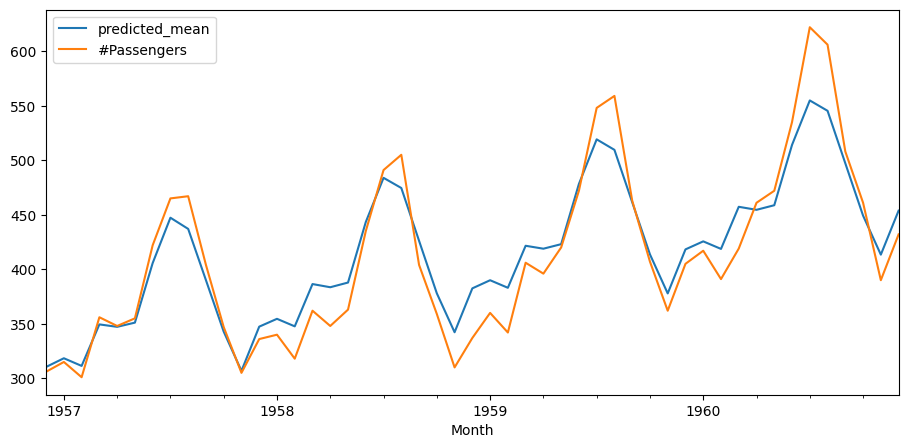

In [ ]:
predction.plot(legend=True)
X_test["#Passengers"].plot(legend=True)

In [ ]:

import math
from sklearn.metrics import mean_squared_error

In [ ]:

import math
from sklearn.metrics import mean_squared_error

In [ ]:
forcast=result.predict(start=len(data),
                      end=(len(data)-1)+3*12,
                      typ="levels").rename('Forecast')

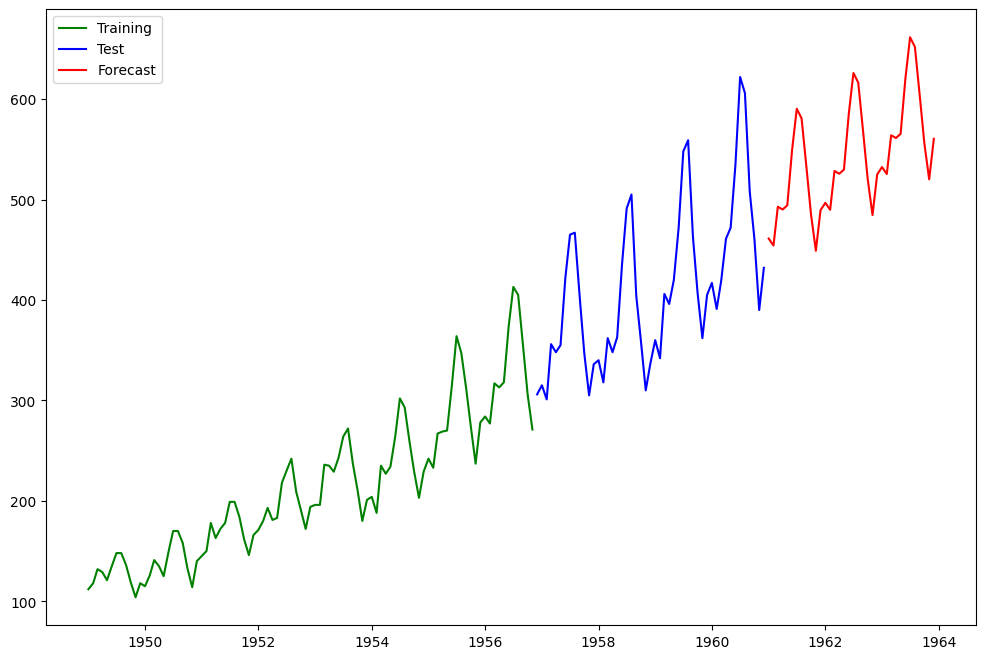

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train["#Passengers"],label="Training",color='green')
plt.plot(X_test["#Passengers"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")